#Get dataset

In [ ]:
api_token = {"username":"trunghieu2001","key":"445de88e52f3c7c40fc10c0f9ef4a461"}
!mkdir ~/.kaggle
!touch ~/.kaggle/kaggle.json
import json

with open('/root/.kaggle/kaggle.json', 'w') as file:
    json.dump(api_token, file)

!chmod 600 ~/.kaggle/kaggle.json

In [ ]:
!kaggle datasets download -d snap/amazon-fine-food-reviews

 98% 237M/242M [00:05<00:00, 36.7MB/s]
100% 242M/242M [00:05<00:00, 46.3MB/s]


In [ ]:
!wget http://nlp.stanford.edu/data/glove.6B.zip

--2021-06-30 19:37:45--  http://nlp.stanford.edu/data/glove.6B.zip
Resolving nlp.stanford.edu (nlp.stanford.edu)... 171.64.67.140
Connecting to nlp.stanford.edu (nlp.stanford.edu)|171.64.67.140|:80... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://nlp.stanford.edu/data/glove.6B.zip [following]
--2021-06-30 19:37:45--  https://nlp.stanford.edu/data/glove.6B.zip
Connecting to nlp.stanford.edu (nlp.stanford.edu)|171.64.67.140|:443... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: http://downloads.cs.stanford.edu/nlp/data/glove.6B.zip [following]
--2021-06-30 19:37:46--  http://downloads.cs.stanford.edu/nlp/data/glove.6B.zip
Resolving downloads.cs.stanford.edu (downloads.cs.stanford.edu)... 171.64.64.22
Connecting to downloads.cs.stanford.edu (downloads.cs.stanford.edu)|171.64.64.22|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 862182613 (822M) [application/zip]
Saving to: ‘glove.6B.zip’

glove.6

In [ ]:
import zipfile
with zipfile.ZipFile('/content/glove.6B.zip', 'r') as zip_ref:
    print('Start unzipping')
    zip_ref.extractall('/content')
    print('Finish unzip')

Start unzipping
Finish unzip


In [ ]:
with zipfile.ZipFile('/content/amazon-fine-food-reviews.zip', 'r') as zip_ref:
    print('Start unzipping')
    zip_ref.extractall('/content')
    print('Finish unzip')

Start unzipping
Finish unzip


In [ ]:
import pandas as pd
import numpy as np

data = pd.read_csv('/content/Reviews.csv')
df = pd.DataFrame(data)
df['Text'] = df['Text'].astype(str)
df['Summary'] = df['Summary'].astype(str)
print(df.dtypes)
print(df.columns)
df = df.drop(['Id', 'ProductId', 'UserId', 'ProfileName', 'HelpfulnessNumerator',
       'HelpfulnessDenominator', 'Score', 'Time'], axis=1)
print(df[:10])


Id                         int64
ProductId                 object
UserId                    object
ProfileName               object
HelpfulnessNumerator       int64
HelpfulnessDenominator     int64
Score                      int64
Time                       int64
Summary                   object
Text                      object
dtype: object
Index(['Id', 'ProductId', 'UserId', 'ProfileName', 'HelpfulnessNumerator',
       'HelpfulnessDenominator', 'Score', 'Time', 'Summary', 'Text'],
      dtype='object')
                                         Summary                                               Text
0                          Good Quality Dog Food  I have bought several of the Vitality canned d...
1                              Not as Advertised  Product arrived labeled as Jumbo Salted Peanut...
2                          "Delight" says it all  This is a confection that has been around a fe...
3                                 Cough Medicine  If you are looking for the secret ingre

In [ ]:
input = [text for text in df['Text']]
target = [text for text in df['Summary']]
print(input[:10])
print(target[:10])

['I have bought several of the Vitality canned dog food products and have found them all to be of good quality. The product looks more like a stew than a processed meat and it smells better. My Labrador is finicky and she appreciates this product better than  most.', 'Product arrived labeled as Jumbo Salted Peanuts...the peanuts were actually small sized unsalted. Not sure if this was an error or if the vendor intended to represent the product as "Jumbo".', 'This is a confection that has been around a few centuries.  It is a light, pillowy citrus gelatin with nuts - in this case Filberts. And it is cut into tiny squares and then liberally coated with powdered sugar.  And it is a tiny mouthful of heaven.  Not too chewy, and very flavorful.  I highly recommend this yummy treat.  If you are familiar with the story of C.S. Lewis\' "The Lion, The Witch, and The Wardrobe" - this is the treat that seduces Edmund into selling out his Brother and Sisters to the Witch.', 'If you are looking for 

#Clean Text

In [ ]:
contractions = { 
"ain't": "am not",
"aren't": "are not",
"can't": "cannot",
"can't've": "cannot have",
"'cause": "because",
"could've": "could have",
"couldn't": "could not",
"couldn't've": "could not have",
"didn't": "did not",
"doesn't": "does not",
"don't": "do not",
"hadn't": "had not",
"hadn't've": "had not have",
"hasn't": "has not",
"haven't": "have not",
"he'd": "he would",
"he'd've": "he would have",
"he'll": "he will",
"he's": "he is",
"how'd": "how did",
"how'll": "how will",
"how's": "how is",
"i'd": "i would",
"i'll": "i will",
"i'm": "i am",
"i've": "i have",
"isn't": "is not",
"it'd": "it would",
"it'll": "it will",
"it's": "it is",
"let's": "let us",
"ma'am": "madam",
"mayn't": "may not",
"might've": "might have",
"mightn't": "might not",
"must've": "must have",
"mustn't": "must not",
"needn't": "need not",
"oughtn't": "ought not",
"shan't": "shall not",
"sha'n't": "shall not",
"she'd": "she would",
"she'll": "she will",
"she's": "she is",
"should've": "should have",
"shouldn't": "should not",
"that'd": "that would",
"that's": "that is",
"there'd": "there had",
"there's": "there is",
"they'd": "they would",
"they'll": "they will",
"they're": "they are",
"they've": "they have",
"wasn't": "was not",
"we'd": "we would",
"we'll": "we will",
"we're": "we are",
"we've": "we have",
"weren't": "were not",
"what'll": "what will",
"what're": "what are",
"what's": "what is",
"what've": "what have",
"where'd": "where did",
"where's": "where is",
"who'll": "who will",
"who's": "who is",
"won't": "will not",
"wouldn't": "would not",
"you'd": "you would",
"you'll": "you will",
"you're": "you are"
}

In [ ]:
import re
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
def clean_text(text, remove_stopwords):
  text = text.lower()
  text = text.split()
  new_text = []
  for word in text:
      if word in contractions:
          new_text.append(contractions[word])
      else:
          new_text.append(word)
  text = " ".join(new_text)
  text = re.sub(r'https?:\/\/.*[\r\n]*', '', text, flags=re.MULTILINE)
  text = re.sub(r'\<a href', ' ', text)
  text = re.sub(r'&amp;', '', text) 
  text = re.sub(r'<br />', ' ', text)
  text = re.sub(r'\'', ' ', text)
  text = re.sub(r'[_"\-;%()|+&=*%.,!?:#$@\[\]/<>]', ' ', text)
  if remove_stopwords:
        text = text.split()
        stops = set(stopwords.words("english"))
        text = [w for w in text if not w in stops]
        text = " ".join(text)
  return text

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [ ]:
clean_input = [clean_text(text, remove_stopwords=True) for text in input]
clean_target = [clean_text(text, remove_stopwords=False) for text in target]
clean_input[:10]

['bought several vitality canned dog food products found good quality product looks like stew processed meat smells better labrador finicky appreciates product better',
 'product arrived labeled jumbo salted peanuts peanuts actually small sized unsalted sure error vendor intended represent product jumbo',
 'confection around centuries light pillowy citrus gelatin nuts case filberts cut tiny squares liberally coated powdered sugar tiny mouthful heaven chewy flavorful highly recommend yummy treat familiar story c lewis lion witch wardrobe treat seduces edmund selling brother sisters witch',
 'looking secret ingredient robitussin believe found got addition root beer extract ordered good made cherry soda flavor medicinal',
 'great taffy great price wide assortment yummy taffy delivery quick taffy lover deal',
 'got wild hair taffy ordered five pound bag taffy enjoyable many flavors watermelon root beer melon peppermint grape etc complaint bit much red black licorice flavored pieces particu

In [ ]:
embeddings_dict = {}
with open('/content/glove.6B.300d.txt', 'r', encoding='utf-8') as glove:
  for line in glove:
    arr = line.split()
    word = arr[0]
    embedding = np.asarray(arr[1:], dtype='float32')
    embeddings_dict[word] = embedding

In [ ]:
BOS = "BOS"
EOS = "EOS"
UNK = "UNK"
PAD = "PAD"

In [ ]:
def count_words(count_dict, text):
    '''Count the number of occurrences of each word in a set of text'''
    for sentence in text:
        for word in sentence.split():
            if word not in count_dict:
                count_dict[word] = 1
            else:
                count_dict[word] += 1
count_dict = {}
count_words(count_dict, clean_input)
count_words(count_dict, clean_target)
len(count_dict) 

117971

In [ ]:
def filter_unknown(text):
  res = []
  for seq in text:
    tokens = seq.split()
    for i in range(0, len(tokens)):
      if count_dict[tokens[i]] < 30:
        tokens[i] = UNK
    res.append(" ".join(tokens))
  return res
clean_input = filter_unknown(clean_input)
clean_target = filter_unknown(clean_target)

In [ ]:
format_target = [BOS + " " + text + " " + EOS for text in clean_target]
encoder_inputs = clean_input
decoder_inputs = format_target

#Convert words to ID

In [ ]:
from keras.preprocessing.text import Tokenizer
VOCAB_SIZE = 117971
full_text = encoder_inputs + decoder_inputs
tokenizer = Tokenizer(num_words=VOCAB_SIZE, lower=False)
tokenizer.fit_on_texts(full_text)
word_index = tokenizer.word_index
len(word_index)

18443

In [ ]:
word2idx = {k:v for k,v in word_index.items()}
idx2word = {v:k for k,v in word_index.items()}
word2idx[PAD] = 0
idx2word[0] = PAD

In [ ]:
num_words = len(word_index)
embedding_dim = 300
embeddings_matrix = np.zeros((num_words + 1, embedding_dim))
for i in range(1, len(embeddings_matrix)):
  word = idx2word[i]
  if word in embeddings_dict:
    embeddings_matrix[i] = embeddings_dict[word]
  else:
    new_embedding = np.array(np.random.uniform(-1.0, 1.0, embedding_dim))
    embeddings_dict[word] = new_embedding
    embeddings_matrix[i] = new_embedding

In [ ]:
text_length = pd.DataFrame(np.array([[len(i.split()) for i in encoder_inputs], [len(i.split()) for i in decoder_inputs]]).T, columns=['text', 'summary'])
text_length.describe()

,text,summary
count,568454.000000,568454.000000
mean,39.558107,6.181371
std,39.823536,2.657877
min,0.000000,2.000000
25%,17.000000,4.000000
50%,28.000000,6.000000
75%,48.000000,7.000000
max,2007.000000,50.000000


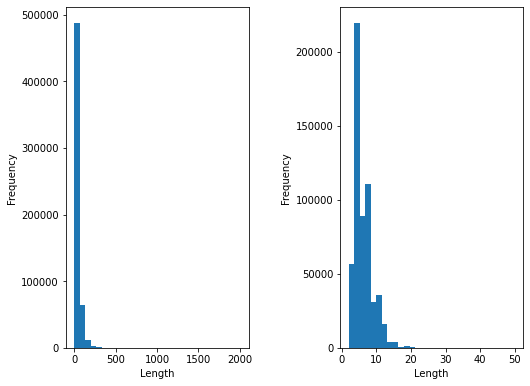

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline
from matplotlib.pyplot import figure

fig, axes = plt.subplots(1, 2, figsize=(8,6))
g1 = axes[0]
g2 = axes[1]
g1.hist(text_length['text'], bins=30)  # density=False would make counts
g1.set_ylabel('Frequency')
g1.set_xlabel('Length');
g2.hist(text_length['summary'], bins=30)  # density=False would make counts
g2.set_ylabel('Frequency')
g2.set_xlabel('Length');

plt.tight_layout(pad = 3)

In [ ]:
text_per = np.percentile(text_length['text'], 95)
sum_per = np.percentile(text_length['summary'], 99)
print(f'99th percentile of text length is {text_per}')
print(f'99th percentile of summary length is {sum_per}')

99th percentile of text length is 108.0
99th percentile of summary length is 15.0


In [ ]:
MIN_TEXT_LENGTH = 3
MIN_SUM_LENGTH = 1
MAX_TEXT_LENGTH = 108
MAX_SUM_LENGTH = 13
UNK_LIMIT = 2

def unk_counter(words):
  count = 0
  for word in words:
    if word == UNK:
      count = count + 1
  return count

def sorted_data_by_length(encoder_text, decoder_text, min_encoder_length, max_encoder_length, min_decoder_length, max_decoder_length, unk_limit):
  sorted_encoder_text = []
  sorted_decoder_text = []
  for i in range(0, len(encoder_text)):
    encoder_words = encoder_text[i].split()
    decoder_words = decoder_text[i].split()
    if (len(encoder_words) < max_encoder_length and
        len(encoder_words) > min_encoder_length and 
        len(decoder_words) > min_decoder_length and
        len(decoder_words) < max_decoder_length and 
        unk_counter(encoder_words) <= unk_limit and
        unk_counter(decoder_words) <= unk_limit):
      sorted_encoder_text.append(encoder_text[i])
      sorted_decoder_text.append(decoder_text[i])
  return sorted_encoder_text, sorted_decoder_text

sorted_encoder_input, sorted_decoder_input = sorted_data_by_length(encoder_inputs, 
                                                                   decoder_inputs,
                                                                   MIN_TEXT_LENGTH,
                                                                   MAX_TEXT_LENGTH, 
                                                                   MIN_SUM_LENGTH,
                                                                   MAX_SUM_LENGTH,
                                                                   UNK_LIMIT)

In [ ]:
encoder_idx = tokenizer.texts_to_sequences(sorted_encoder_input)
decoder_idx = tokenizer.texts_to_sequences(sorted_decoder_input)

In [ ]:
from keras.preprocessing.sequence import pad_sequences
encoder_input_data = pad_sequences(encoder_idx, maxlen=MAX_TEXT_LENGTH, dtype='int32', padding='post', truncating='post')
decoder_input_data = pad_sequences(decoder_idx, maxlen=MAX_SUM_LENGTH, dtype='int32', padding='post', truncating='post')

In [ ]:
print(encoder_input_data.shape)
print(decoder_input_data.shape)

(501339, 108)
(501339, 13)


In [ ]:
output_data = decoder_input_data[:,1:]
decoder_input_data = decoder_input_data[:,:-1]

#Prepare train, valid, test data

In [ ]:
!pip install -U tensorflow-addons
import tensorflow as tf
import tensorflow_addons as tfa

     |████████████████████████████████| 686kB 4.3MB/s 


In [ ]:
from sklearn.model_selection import train_test_split
#split train, val and test data
encoder_train_input, encoder_valid_test_input = train_test_split(encoder_input_data, test_size = 0.2, random_state=42)
decoder_train_input, decoder_valid_test_input = train_test_split(decoder_input_data, test_size = 0.2, random_state=42)
output_data_train, output_data_valid_test = train_test_split(output_data, test_size=0.2, random_state=42)

#split val and test data
encoder_val_input, encoder_test_input = train_test_split(encoder_valid_test_input, test_size = 0.2, random_state=42)
decoder_val_input, decoder_test_input = train_test_split(decoder_valid_test_input, test_size = 0.2, random_state=42)
output_data_val, output_data_test = train_test_split(output_data_valid_test, test_size = 0.2, random_state=42)

In [ ]:
print(f'encoder train shape {encoder_train_input.shape}')
print(f'encoder valid shape {encoder_val_input.shape}')
print(f'encoder test shape {encoder_test_input.shape}')
print()
print(f'decoder train shape {decoder_train_input.shape}')
print(f'decoder valid shape {decoder_val_input.shape}')
print(f'decoder test shape {decoder_test_input.shape}')
print()
print(f'output train shape {output_data_train.shape}')
print(f'output valid shape {output_data_val.shape}')
print(f'output test shape {output_data_test.shape}')

encoder train shape (401071, 108)
encoder valid shape (80214, 108)
encoder test shape (20054, 108)

decoder train shape (401071, 12)
decoder valid shape (80214, 12)
decoder test shape (20054, 12)

output train shape (401071, 12)
output valid shape (80214, 12)
output test shape (20054, 12)


#Build Model

In [ ]:
from keras.layers import Embedding
from keras.layers import Input, Dense, LSTM, TimeDistributed, LSTMCell
from keras.models import Model
import tensorflow_addons as tfa
def embedding_layer(sequence_length):
  embedding_layer = tf.keras.layers.Embedding(len(word_index) + 1,
                            embedding_dim,
                            weights=[embeddings_matrix],
                            input_length=sequence_length,
                            trainable=False)
  return embedding_layer

def seq2seq_model_builder(units=300):
  encoder_inputs = tf.keras.layers.Input(shape=[None], dtype=np.int32)
  decoder_inputs = tf.keras.layers.Input(shape=[None], dtype=np.int32)

  encoder_embeddings = tf.keras.layers.Embedding(len(word_index) + 1,
                            embedding_dim,
                            weights=[embeddings_matrix],
                            input_length=MAX_TEXT_LENGTH,
                            trainable=False)(encoder_inputs)

  decoder_embedding_layer = tf.keras.layers.Embedding(len(word_index) + 1,
                            embedding_dim,
                            weights=[embeddings_matrix],
                            input_length=12,
                            trainable=False)
  decoder_embeddings = decoder_embedding_layer(decoder_inputs)

  encoder = tf.keras.layers.LSTM(units, return_state=True)
  encoder_outputs, state_h, state_c = encoder(encoder_embeddings)
  encoder_state = [state_h, state_c]

  sampler = tfa.seq2seq.sampler.TrainingSampler()

  decoder_cell = tf.keras.layers.LSTMCell(units)
  output_layer = tf.keras.layers.Dense(len(word_index) + 1)

  decoder = tfa.seq2seq.basic_decoder.BasicDecoder(decoder_cell,
                                                  sampler,
                                                  output_layer=output_layer)
  final_outputs, final_state, final_sequence_lengths = decoder(
      decoder_embeddings,
      initial_state=encoder_state)
  Y_proba = tf.keras.layers.Activation("softmax")(final_outputs.rnn_output)

  model = tf.keras.models.Model(inputs=[encoder_inputs, decoder_inputs],
                            outputs=[Y_proba])
  return model


In [ ]:
model = seq2seq_model_builder()

In [ ]:
model.summary()
# tf.keras.utils.plot_model(model, show_shapes=True)

Model: "model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, None)]       0                                            
__________________________________________________________________________________________________
input_2 (InputLayer)            [(None, None)]       0                                            
__________________________________________________________________________________________________
embedding (Embedding)           (None, None, 300)    5533200     input_1[0][0]                    
__________________________________________________________________________________________________
embedding_1 (Embedding)         (None, None, 300)    5533200     input_2[0][0]                    
______________________________________________________________________________________________

#Model Training

In [ ]:
model.compile(optimizer='adam', loss ='sparse_categorical_crossentropy', metrics = ['accuracy'])

In [68]:
BATCH_SIZE = 32
EPOCHS = 10

In [69]:
checkpoint = tf.keras.callbacks.ModelCheckpoint('/content/drive/MyDrive/AmazonReviews/model-{epoch:03d}-{accuracy:03f}-{val_accuracy:03f}.h5', verbose=1, monitor='loss',save_best_only=True, mode='auto')

In [70]:
history = model.fit([encoder_train_input, decoder_train_input], 
                     output_data_train, 
                     epochs=  EPOCHS,
                     batch_size=BATCH_SIZE,
                     callbacks=[checkpoint],
                     validation_data=([encoder_val_input, decoder_val_input], output_data_val))

Epoch 1/10
12534/12534 [==============================] - 830s 66ms/step - loss: 0.8682 - accuracy: 0.8201 - val_loss: 1.3625 - val_accuracy: 0.7876

Epoch 00001: loss improved from inf to 0.86818, saving model to /content/drive/MyDrive/AmazonReviews/model-001-0.820146-0.787580.h5
Epoch 2/10
12534/12534 [==============================] - 828s 66ms/step - loss: 0.8650 - accuracy: 0.8206 - val_loss: 1.3734 - val_accuracy: 0.7873

Epoch 00002: loss improved from 0.86818 to 0.86499, saving model to /content/drive/MyDrive/AmazonReviews/model-002-0.820607-0.787284.h5
Epoch 3/10
12534/12534 [==============================] - 830s 66ms/step - loss: 0.8620 - accuracy: 0.8209 - val_loss: 1.3753 - val_accuracy: 0.7877

Epoch 00003: loss improved from 0.86499 to 0.86195, saving model to /content/drive/MyDrive/AmazonReviews/model-003-0.820883-0.787701.h5
Epoch 4/10
12534/12534 [==============================] - 829s 66ms/step - loss: 0.8591 - accuracy: 0.8213 - val_loss: 1.3803 - val_accuracy: 0.78

In [ ]:
text = []
for seq in decoder_test_input:
  sentence = []
  for idx in seq:
    if idx2word[idx] != 'BOS' and idx2word[idx] != 'PAD' and idx2word[idx] != 'EOS':
      sentence.append(idx2word[idx])
  text.append(" ".join(sentence))
text

In [ ]:
text = []
for seq in encoder_test_input:
  sentence = []
  for idx in seq:
    if idx2word[idx] != 'BOS' and idx2word[idx] != 'PAD' and idx2word[idx] != 'EOS':
      sentence.append(idx2word[idx])
  text.append(" ".join(sentence))
text

#Predict and Inference

In [44]:
model.load_weights('/content/drive/MyDrive/AmazonReviews/model-019-0.819509-0.787462.h5')

In [52]:
def text_to_padded_idx(text):
    words = text.split()
    ids_text = [word2idx[word] for word in words]
    ids_text = tf.constant(ids_text)
    if len(ids_text) < MAX_TEXT_LENGTH:
      ids_text = tf.pad(ids_text, [[0, MAX_TEXT_LENGTH - len(ids_text)]])
    return ids_text

def ids_to_word(ids):
  res = []
  for sequence in ids:
    res.append(" ".join([idx2word[index.numpy()] for index in sequence]))
  return res

def predict_summary(texts, model):
    print(texts)
    X = np.array([text_to_padded_idx(text) for text in texts])
    Y_pred = tf.fill(dims=(len(X), 1), value=word2idx['BOS'])
    for index in range(MAX_SUM_LENGTH - 1):
        pad_size = MAX_SUM_LENGTH - 1 - Y_pred.shape[1]
        X_decoder = tf.pad(Y_pred, [[0, 0], [0, pad_size]])
        Y_probas_next = model.predict([X, X_decoder])[:, index:index+1]
        Y_pred_next = tf.argmax(Y_probas_next, axis=-1, output_type=tf.int32)
        Y_pred = tf.concat([Y_pred, Y_pred_next], axis=1)
    return ids_to_word(Y_pred[:, 1:])

In [83]:
predict_summary([clean_text(df['Text'][75001], True)], model)

['sure helps tarter since dogs need teeth cleaned every year tell really love stuff seem help breath probably settling stomachs never bad reaction treat']


['dogs love them EOS PAD PAD PAD PAD PAD PAD PAD PAD']

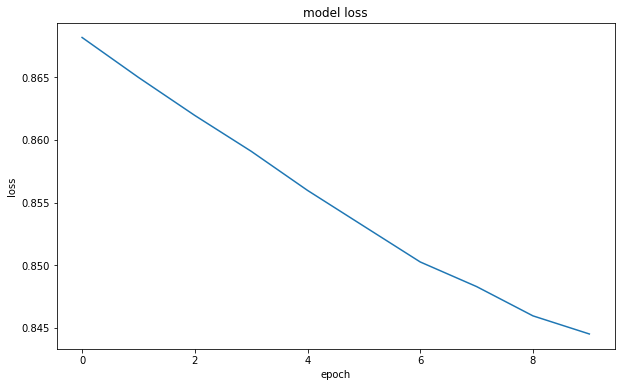

In [79]:
plt.figure(figsize=(10, 6))
plt.plot(history.history['loss'])
#plt.plot(history.history['val_acc'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
# plt.legend(['train', 'test'], loc='upper left')
plt.show()